In [3]:
import tweepy
import networkx as nx
import pandas as pd
import json
import numpy as np
from networkx.readwrite import json_graph
%matplotlib inline



In [2]:
consumer_key = "2e6dNamYAUwvPcLJ5YKn9ow6R"
consumer_secret = "VFujaQNDkF6d7YKrTttJzMhCfNpFcYCnMyDSvjGssEvq4WYvnm"
access_token = "939149568519815169-c6Lti1dhyk5Z8wmwymsrpvw1BtxVE0Z"
access_token_secret = "IaQwQlN3yrkoZsB5nzi8Ha2AO1TseVdLcPJgltP6ljZiI"   

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
res = api.get_user('MakeItAllWork')

In [5]:
followers = []
max_fetch = 10
min_fetch = 5
with open("followers.txt", "w") as file:
    for user in tweepy.Cursor(api.followers, id=res.id, tweet_mode='extended').items(max_fetch):
        file.write(str(user.id) + '\t' + str(res.id) + '\n')
        followers.append(user.id)
    for followerId in followers:
        for userId in tweepy.Cursor(api.friends_ids, id=followerId, tweet_mode='extended').items(min_fetch):
            file.write(str(followerId) + '\t' + str(userId) + '\n')

In [7]:
friends = []

In [8]:
with open("friends.txt", "w") as file:
    for id in tweepy.Cursor(api.friends_ids, id=res.id, tweet_mode='extended').items(max_fetch):
        file.write(str(res.id) + '\t' + str(id) + '\n')
        friends.append(id)
    for friendId in friends:
        for userId in tweepy.Cursor(api.friends_ids, id=friendId, tweet_mode='extended').items(min_fetch):
            file.write(str(friendId) + '\t' + str(userId) + '\n')

Rate limit reached. Sleeping for: 663


In [9]:
def get_network(filename, G2=None):
    G = nx.read_edgelist(filename, create_using=nx.DiGraph())
    if G2 != None:
        G = nx.compose(G, G2)
    return G

In [12]:
G = get_network("friends.txt")
G = get_network("followers.txt", G)
G.add_node('301829187', attr_dict={'gg':12})
G.nodes(data=True)

NodeDataView({'957137135785607168': {}, '23994503': {}, '743856512': {}, '3100117052': {}, '39099783': {}, '2887131725': {}, '804464317592547328': {}, '799350189932675072': {}, '9860432': {}, '3278180064': {}, '886362667061039105': {}, '89829880': {}, '37320030': {}, '31622212': {}, '20643704': {}, '15961241': {}, '147494798': {}, '707175879491915776': {}, '4843180262': {}, '241240768': {}, '58027303': {}, '2446203199': {}, '1317152466': {}, '444909293': {}, '2391206671': {}, '2453418120': {}, '4060832015': {}, '14499004': {}, '41352598': {}, '384569862': {}, '119051756': {}, '512710201': {}, '715324052756238336': {}, '178203295': {}, '3415329345': {}, '3744250757': {}, '32219625': {}, '45269939': {}, '75942425': {}, '2207327185': {}, '344960464': {}, '17679150': {}, '14277681': {}, '941784037886017536': {}, '11791512': {}, '263547393': {}, '24387293': {}, '19733127': {}, '3674768896': {}, '278369340': {}, '2299092696': {}, '1556431742': {}, '2592342050': {}, '81136113': {}, '85392594'

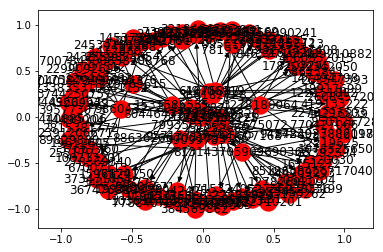

In [19]:
nx.draw_networkx(G)
data = json_graph.node_link_data(G)
json_data = json.dumps(data)


In [30]:
with open("friendGraph.json", 'w') as file:
    file.write(json_data)

In [7]:
with open("friendGraph.json", 'r') as file:
    json_data = file.read()
    data2 = json.loads(json_data)
G = json_graph.node_link_graph(data2)

In [8]:
G.nodes()

NodeView(('957137135785607168', '23994503', '743856512', '3100117052', '39099783', '2887131725', '804464317592547328', '799350189932675072', '9860432', '3278180064', '886362667061039105', '89829880', '37320030', '31622212', '20643704', '15961241', '147494798', '707175879491915776', '4843180262', '241240768', '58027303', '2446203199', '1317152466', '444909293', '2391206671', '2453418120', '4060832015', '14499004', '41352598', '384569862', '119051756', '512710201', '715324052756238336', '178203295', '3415329345', '3744250757', '32219625', '45269939', '75942425', '2207327185', '344960464', '17679150', '14277681', '941784037886017536', '11791512', '263547393', '24387293', '19733127', '3674768896', '278369340', '2299092696', '1556431742', '2592342050', '81136113', '85392594', '117027784', '106850921', '106065333', '103630413', '100213201', '98906671', '59412175', '813143705909690368', '301829187', '1531585555', '61675887', '772419408', '115763615', '49706919', '366182728', '52259660', '7282

In [9]:
for node in G.nodes():
    res = api.get_user(node)
    G.add_node(node, attr_dict = {'status_count' : res.statuses_count})

In [10]:
G.nodes(data=True)

NodeDataView({'957137135785607168': {'attr_dict': {'status_count': 0}}, '23994503': {'attr_dict': {'status_count': 19129}}, '743856512': {'attr_dict': {'status_count': 6024}}, '3100117052': {'attr_dict': {'status_count': 5235}}, '39099783': {'attr_dict': {'status_count': 102120}}, '2887131725': {'attr_dict': {'status_count': 2939}}, '804464317592547328': {'attr_dict': {'status_count': 233}}, '799350189932675072': {'attr_dict': {'status_count': 341}}, '9860432': {'attr_dict': {'status_count': 45819}}, '3278180064': {'attr_dict': {'status_count': 2}}, '886362667061039105': {'attr_dict': {'status_count': 193}}, '89829880': {'attr_dict': {'status_count': 2389}}, '37320030': {'attr_dict': {'status_count': 5472}}, '31622212': {'attr_dict': {'status_count': 1344}}, '20643704': {'attr_dict': {'status_count': 4521}}, '15961241': {'attr_dict': {'status_count': 3608}}, '147494798': {'attr_dict': {'status_count': 359}}, '707175879491915776': {'attr_dict': {'status_count': 375}}, '4843180262': {'at

In [11]:
def saveGraph(G, filename):
    data = json_graph.node_link_data(G)
    json_data = json.dumps(data)
    with open(filename, 'w') as file:
        file.write(json_data)

In [12]:
saveGraph(G, 'friendGraph.json')

In [5]:
with open("friendGraph.json", 'r') as file:
    json_data = file.read()
    data2 = json.loads(json_data)
G = json_graph.node_link_graph(data2)

In [123]:
def getProbabMatrix(G, center_nodes = []):
    probab_matrix = []
    node_array = [node for center_node in center_nodes for (node, self) in G.in_edges(center_node)]
    node_array = node_array + center_nodes
    node_array = list(set(node_array))
    print(node_array)
    for node1 in node_array:
        if len(G.edges(node1)) == 0:
            probab_matrix.append([0 for a in range(0, len(node_array))])
            continue
        neighSum = 0
        for (self, neighbor) in G.edges(node1):
            neighSum = neighSum + G.node[neighbor]['attr_dict']['status_count']
        probab_vector = []
        for node2 in node_array:
            if G.has_edge(node1, node2):
                score = G.node[node2]['attr_dict']['status_count'] / neighSum
            else:
                score = 0
            probab_vector.append(score)
        probab_matrix.append(probab_vector)
    return np.array(probab_matrix), node_array

In [124]:
probab_matrix, node_array = getProbabMatrix(G, ['23994503', '81136113'])

['804464317592547328', '2887131725', '9860432', '81136113', '3278180064', '39099783', '743856512', '23994503', '799350189932675072', '3100117052', '957137135785607168', '886362667061039105']


In [125]:
probab_matrix.T

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.04739213,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  

In [126]:
np.random.seed(42)

def compute_rank(probab_matrix, node_array, iterations=100, gamma=0.5):
    rank_vector = np.array([1 for a in node_array])
    for i in range(1, 2):
        rank_vector = gamma * np.dot(probab_matrix.T, rank_vector)
    return rank_vector

In [127]:
compute_rank(probab_matrix, node_array)

array([ 0.        ,  0.        ,  0.        ,  0.02369606,  0.        ,
        0.        ,  0.        ,  2.10254381,  0.        ,  0.        ,
        0.        ,  0.        ])

In [42]:
node_array.index('23994503')

43